#  Alzheimer MRI Preprocessed(detection and classification)

# LIBRARIES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

# DATA LOAD

In [3]:
!pip install split-folders
import splitfolders
splitfolders.ratio('Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1)) 

Copying files: 6400 files [00:32, 199.11 files/s]


In [4]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# EXAMPLE IMAGE

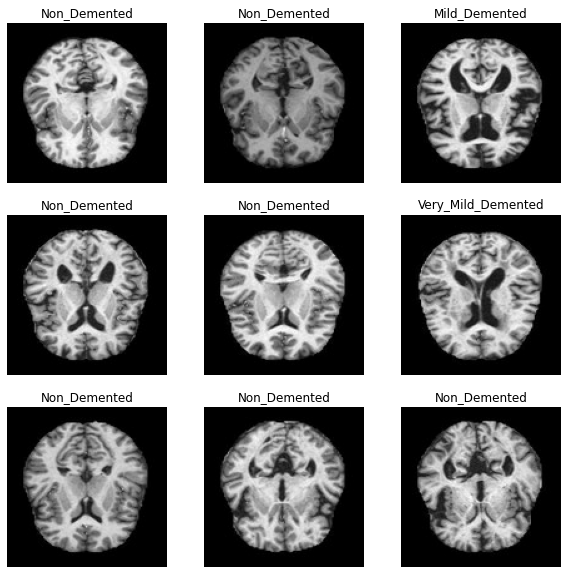

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

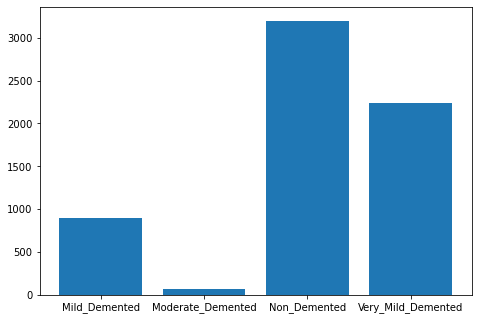

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

# MODEL

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [11]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=100, batch_size=64, verbose=1)

Epoch 1/100
80/80 [==============================] - 34s 400ms/step - loss: 1.1069 - accuracy: 0.4989 - val_loss: 0.9679 - val_accuracy: 0.5837
Epoch 2/100
80/80 [==============================] - 30s 377ms/step - loss: 0.9084 - accuracy: 0.5679 - val_loss: 0.8599 - val_accuracy: 0.6103
Epoch 3/100
80/80 [==============================] - 31s 382ms/step - loss: 0.8467 - accuracy: 0.6095 - val_loss: 0.7424 - val_accuracy: 0.6886
Epoch 4/100
80/80 [==============================] - 31s 385ms/step - loss: 0.7464 - accuracy: 0.6730 - val_loss: 0.7297 - val_accuracy: 0.6823
Epoch 5/100
80/80 [==============================] - 31s 385ms/step - loss: 0.6275 - accuracy: 0.7259 - val_loss: 0.5482 - val_accuracy: 0.7966
Epoch 6/100
80/80 [==============================] - 32s 397ms/step - loss: 0.5262 - accuracy: 0.7738 - val_loss: 0.4868 - val_accuracy: 0.8075
Epoch 7/100
80/80 [==============================] - 34s 421ms/step - loss: 0.3883 - accuracy: 0.8412 - val_loss: 0.3425 - val_accuracy:

80/80 [==============================] - 51s 639ms/step - loss: 0.0180 - accuracy: 0.9932 - val_loss: 0.0462 - val_accuracy: 0.9812
Epoch 58/100
80/80 [==============================] - 51s 638ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.0206 - val_accuracy: 0.9937
Epoch 59/100
80/80 [==============================] - 51s 637ms/step - loss: 0.0155 - accuracy: 0.9937 - val_loss: 0.0116 - val_accuracy: 0.9953
Epoch 60/100
80/80 [==============================] - 51s 639ms/step - loss: 0.0198 - accuracy: 0.9943 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 61/100
80/80 [==============================] - 51s 637ms/step - loss: 0.0096 - accuracy: 0.9965 - val_loss: 0.0189 - val_accuracy: 0.9937
Epoch 62/100
80/80 [==============================] - 51s 637ms/step - loss: 0.0137 - accuracy: 0.9949 - val_loss: 0.0154 - val_accuracy: 0.9937
Epoch 63/100
80/80 [==============================] - 51s 639ms/step - loss: 0.0094 - accuracy: 0.9955 - val_loss: 0.0379 - val_accuracy: 0.992

# Plot the result


In [12]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

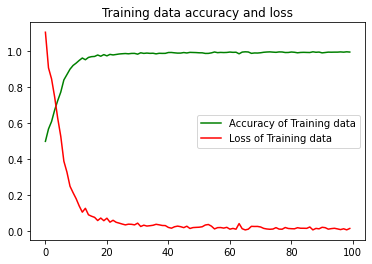

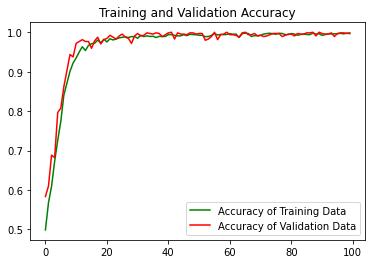

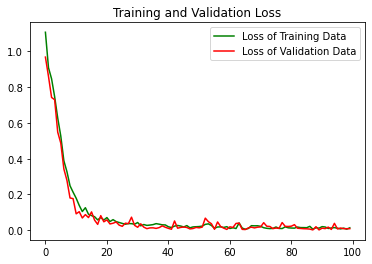

<Figure size 432x288 with 0 Axes>

In [13]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# Predictions

In [14]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 2s 93ms/step - loss: 0.0193 - accuracy: 0.9938


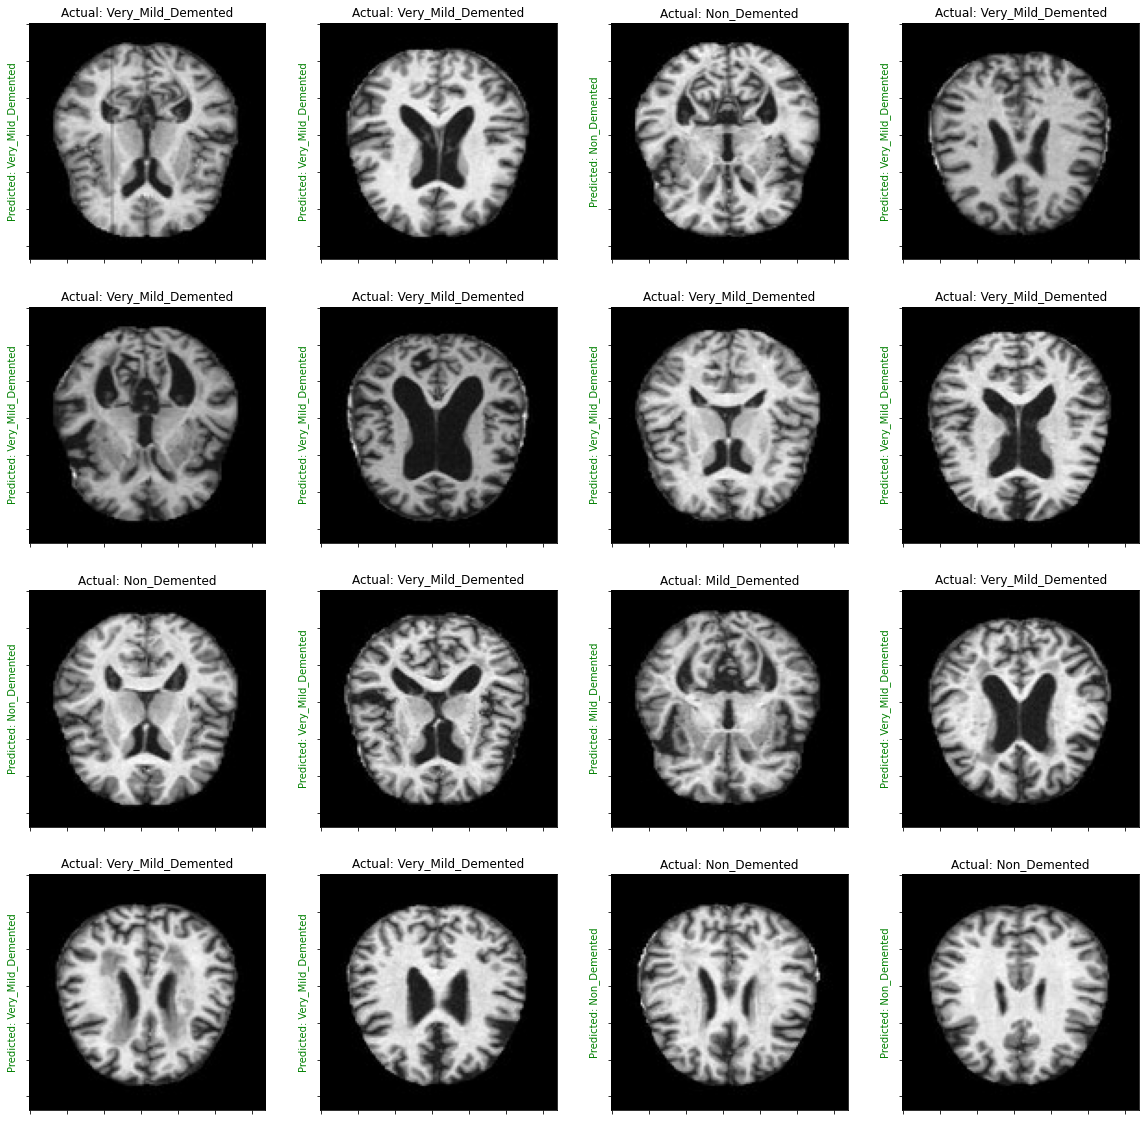

In [15]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])